In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image_root_dir_path = "../input/imgs/brown_result"
image_file_path = image_root_dir_path + "/5/1100292179.jpg"

In [4]:
import cv2

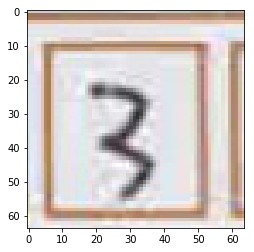

In [5]:
src = cv2.imread(image_file_path, 1)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)

In [6]:
from skz_utils import im_utils

/Users/chou/.pyenv/versions/anaconda3-5.0.0/envs/std_env/lib/python3.6/site-packages/skz_utils/vi_utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/chou/.pyenv/versions/anaconda3-5.0.0/envs/std_env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/chou/.pyenv/versions/anaconda3-5.0.0/envs/std_env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/chou/.pyenv/versions/anaconda3-5.0.0/envs/std_env/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/chou/.pyenv/versions/anaconda3-5.0.0/envs/std_env/lib/python3.6/site-packages/traitlets/conf

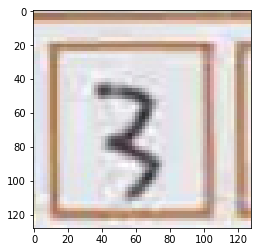

In [7]:
img = im_utils.resize_with_aspect(src,  height=128)
plt.imshow(img)

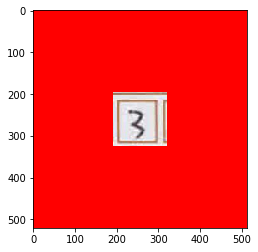

In [8]:
desired_size = (521,512)
img_size = img.shape
delta_w = desired_size[1] - img_size[1]
delta_h = desired_size[0] - img_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

color = [255, 0, 0]
new_im = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)
plt.imshow(new_im)

In [9]:
def resize_with_padding(src, dst_size, padding_color=[255,255,255]):
    src_w = src.shape[1]
    src_h = src.shape[0]
    dst_w, dst_h = dst_size
    if src_w > dst_w or src_h > dst_h:
        src = im_utils.resize_with_aspect(src, width=dst_w,  height=dst_h)
    src_w = src.shape[1]
    src_h = src.shape[0]
    delta_w = dst_w  - src_w
    delta_h = dst_h - src_h
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    dst = cv2.copyMakeBorder(src, top, bottom, left, right, cv2.BORDER_CONSTANT, value=padding_color)
    return dst

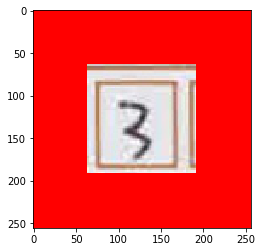

In [11]:
plt.imshow(im_utils.resize_with_padding(img, (256, 256), padding_color=[255]))

In [52]:
img_W, img_H, img_C = 2,2,3
header = "path, label,"
for i in range(img_W * img_H):
    if img_C == 1:
        pixel_str = "pixel" + str(i)
    elif img_C == 3:
        pixel_str = "pixel" + str(i) + "_r," + "pixel" + str(i) + "_g," + "pixel" + str(i) + "_b,"
        header = header + (pixel_str)

In [53]:
header = header.split(',')[:-1]
header[-1]

'pixel3_b'

In [54]:
header_list = header
for i, col_name in enumerate(header_list[2:]):
    print(col_name, i)

pixel0_r 0
pixel0_g 1
pixel0_b 2
pixel1_r 3
pixel1_g 4
pixel1_b 5
pixel2_r 6
pixel2_g 7
pixel2_b 8
pixel3_r 9
pixel3_g 10
pixel3_b 11


In [81]:
import os_utils
import pandas as pd
def image_pd_dataset_from_dir(img_dir_path, input_shape, ext, th_value = None):
    '''create image dataset with label from directory
    '''
    img_W, img_H, img_C = input_shape
    y_list = []
    x_list = []
    p_list = []
    # read category
    for dir_name in os_utils.get_dir_name_list(img_dir_path):
        dir_path = os.path.join(img_dir_path, dir_name)
        # read image
        for img_path in os_utils.get_file_path_list(dir_path, ext):
            p_list.append(img_path)
            # read image data
            if img_C == 1:
                img = cv2.imread(img_path, 0)
                if th_value is not None:
                    _,img = cv2.threshold(img,th_value,255,cv2.THRESH_BINARY)
            elif img_C == 3:
                img = cv2.imread(img_path, 1)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                assert False, "<create_dataset> Invalid img_C value! {}".format(img_C)
            img = cv2.resize(img, (img_W, img_H))
            # create record
            y_list.append(int(dir_name))
            x_list.append(img.flatten())
    X = np.array(x_list).reshape(-1, (img_W*img_H*img_C))
    
    header = "path, label,"
    for i in range(img_W * img_H):
        if img_C == 1:
            pixel_str = "pixel" + str(i)
        elif img_C == 3:
            pixel_str = "pixel" + str(i) + "_r," + "pixel" + str(i) + "_g," + "pixel" + str(i) + "_b,"
            header = header + (pixel_str)
    header_list = header.split(',')[:-1]

    row_list = []
    for i in range(X.shape[0]):
        row = list(X[i,:])
        row.insert(0, p_list[i])
        row.insert(1, y_list[i])
        row_list.append(row)

    df = pd.DataFrame(row_list, columns=header_list)

    return df

In [82]:
%pwd

'/Volumes/deepstation/dev/utils/skyz_pyutils/skz_utils'

In [83]:
img_dir_path = "../input/imgs/brown_result"
df = image_pd_dataset_from_dir(img_dir_path, (64,64,3), 'jpg')
df.to_csv("data.csv")

(1184, 12288)
(1184, 12290)
